In [43]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Defining some utility functions


In [44]:
# Double y axis plot
def plot_line(df,col1,col2,lag1 = 0,lag2= 0):
    
    col1_val = df[col1].shift(lag1)
    col2_val = df[col2].shift(lag2)

    fig,ax = plt.subplots()
    
    ax.plot(df.index, col1_val, color="blue", marker=".")
    
    ax.set_xlabel("year",fontsize=14)
    
    ax.set_ylabel(col1,color="blue",fontsize=14)

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, col2_val,color="red",marker=".")
    ax2.set_ylabel(col2,color="red",fontsize=14)
    plt.show()
    
    print(np.corrcoef(col1_val.dropna(),col2_val.dropna()))
    


In [45]:
# index
monthly_rng = pd.date_range("01-2001","1-2021", freq = "M")
monthly_rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=240, freq='M')

In [46]:
files = os.listdir("./data_cleaned")
len(files)

29

* We have collected data for 26 features

In [47]:
df_dict = {}

for filename in files:
    tdf = pd.read_csv(os.path.join("data_cleaned",filename))
    df_dict.update({tdf.iloc[:,1].name : list(tdf.iloc[:,1])})
    
final_df = pd.DataFrame(df_dict,monthly_rng)

final_df.to_csv("./data_cleaned/final_df.csv")

In [48]:
final_df.rename(columns ={"0":"private_job_gains"},inplace=True)
df = final_df.copy()
df = df[:"2015"]
df["gdp_per_capita"] = df["GDP"]/df["population"]

In [49]:
df.corr()

,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_45_54,avg_expenditure_55_64,CPI,employees_construction,GDP,HCAI_GOVT,HCAI_GSE,HCAI_PP,...,personal_saving_rate,population,house_units_completed,producer_price_index_concrete_brick,residential_const_val,retail_sales_home_furnishing_stores,target,UNRATE,unrate_construction,gdp_per_capita
avg_expenditure_25_34,1.000000,0.983354,0.973711,0.984479,-0.107668,-0.317665,0.952762,-0.790514,-0.559341,-0.752091,...,0.372560,0.933571,-0.650173,0.939673,-0.269678,0.104997,0.625049,0.308999,0.219969,0.961125
avg_expenditure_35_44,0.983354,1.000000,0.981350,0.973879,-0.114017,-0.246568,0.938442,-0.758974,-0.517089,-0.729627,...,0.321769,0.910183,-0.600279,0.921954,-0.219257,0.159092,0.668978,0.239996,0.172775,0.947955
avg_expenditure_45_54,0.973711,0.981350,1.000000,0.975075,-0.141566,-0.325187,0.963686,-0.814481,-0.593582,-0.761067,...,0.422436,0.943799,-0.632345,0.930963,-0.242935,0.119018,0.611540,0.269972,0.177581,0.967187
avg_expenditure_55_64,0.984479,0.973879,0.975075,1.000000,-0.115255,-0.349628,0.957653,-0.818489,-0.598444,-0.776111,...,0.391519,0.945344,-0.666056,0.949990,-0.285953,0.073192,0.608795,0.339044,0.235364,0.963584
CPI,-0.107668,-0.114017,-0.141566,-0.115255,1.000000,0.087648,-0.111063,0.123025,0.145867,0.119631,...,-0.164487,-0.124807,0.085375,-0.122264,0.098157,0.068915,0.011917,-0.059533,0.100415,-0.102896
employees_construction,-0.317665,-0.246568,-0.325187,-0.349628,0.087648,1.000000,-0.458099,0.796232,0.910144,0.727266,...,-0.767610,-0.579379,0.864734,-0.570863,0.850321,0.796551,0.441405,-0.873424,-0.697267,-0.414852
GDP,0.952762,0.938442,0.963686,0.957653,-0.111063,-0.458099,1.000000,-0.873797,-0.663629,-0.820948,...,0.513176,0.988058,-0.711062,0.950969,-0.316552,0.048127,0.515745,0.331420,0.196466,0.998465
HCAI_GOVT,-0.790514,-0.758974,-0.814481,-0.818489,0.123025,0.796232,-0.873797,1.000000,0.932369,0.922474,...,-0.703926,-0.933326,0.917325,-0.925116,0.666152,0.415025,-0.114472,-0.683054,-0.520159,-0.849903
HCAI_GSE,-0.559341,-0.517089,-0.593582,-0.598444,0.145867,0.910144,-0.663629,0.932369,1.000000,0.857535,...,-0.763114,-0.760101,0.918802,-0.760676,0.801145,0.663222,0.200154,-0.795128,-0.625052,-0.627309
HCAI_PP,-0.752091,-0.729627,-0.761067,-0.776111,0.119631,0.727266,-0.820948,0.922474,0.857535,1.000000,...,-0.690076,-0.869804,0.943241,-0.908763,0.761120,0.434242,-0.022752,-0.580771,-0.443510,-0.797713


## Demographic
* population                           
### Income-age distribution
* average expenditure 25-34
* average expenditure 35-44
* average expenditure 45-54 
* avg-expenditure-55-64

### Mortagages
* HCAI_GOVT
* HCAI_GSE
* HCAI_PP
* MORTGAGE30US

### Health of the economy
* GDP                                  
* CPI         
* private_job_gains                    
* personal_saving_rate
* UNRATE - Unemployment rate
* unrate_construction -  Unemployment rate in construction industry

### Construction Industry
* employees_construction 
* industrial_production_cement
* pvt_owned_house_under_const          
* residential_const_val
* producer_price_index_concrete_brick

### Housing industry
* houses-for-sale-to-sold - Number of houses for sale vs number of houses got sold
* home-ownership-rate
* house_units_completed - Number of new house units completed in a given month   
* retail_sales_home_furnishing_stores  - Sales of home furnishing stores

### Infrastructure and permits
* nonresidential_const_val
* permits                              


## DEMOGRAPHICS FACTORS

In [50]:
demodf = df.copy()
demodf = demodf[["population","avg_expenditure_25_34","avg_expenditure_35_44","avg_expenditure_55_64","avg_expenditure_45_54","target"]]
demodf

,population,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_55_64,avg_expenditure_45_54,target
2001-01-31,284169.00,38987.0,45296.0,39517.0,46308.0,109.845
2001-02-28,284392.00,39029.0,45443.0,39694.0,46456.0,110.499
2001-03-31,284615.00,39071.0,45590.0,39871.0,46604.0,111.107
2001-04-30,284838.00,39113.0,45737.0,40048.0,46752.0,111.650
2001-05-31,285086.67,39155.0,45884.0,40225.0,46900.0,112.162
...,...,...,...,...,...,...
2015-08-31,321413.67,51227.0,64392.0,57947.0,68387.0,172.954
2015-09-30,321622.34,51437.0,64627.0,58157.0,68729.0,173.848
2015-10-31,321831.00,51647.0,64862.0,58367.0,69071.0,174.811
2015-11-30,322005.33,51857.0,65097.0,58577.0,69413.0,175.755


Text(0.5, 1.0, 'target')

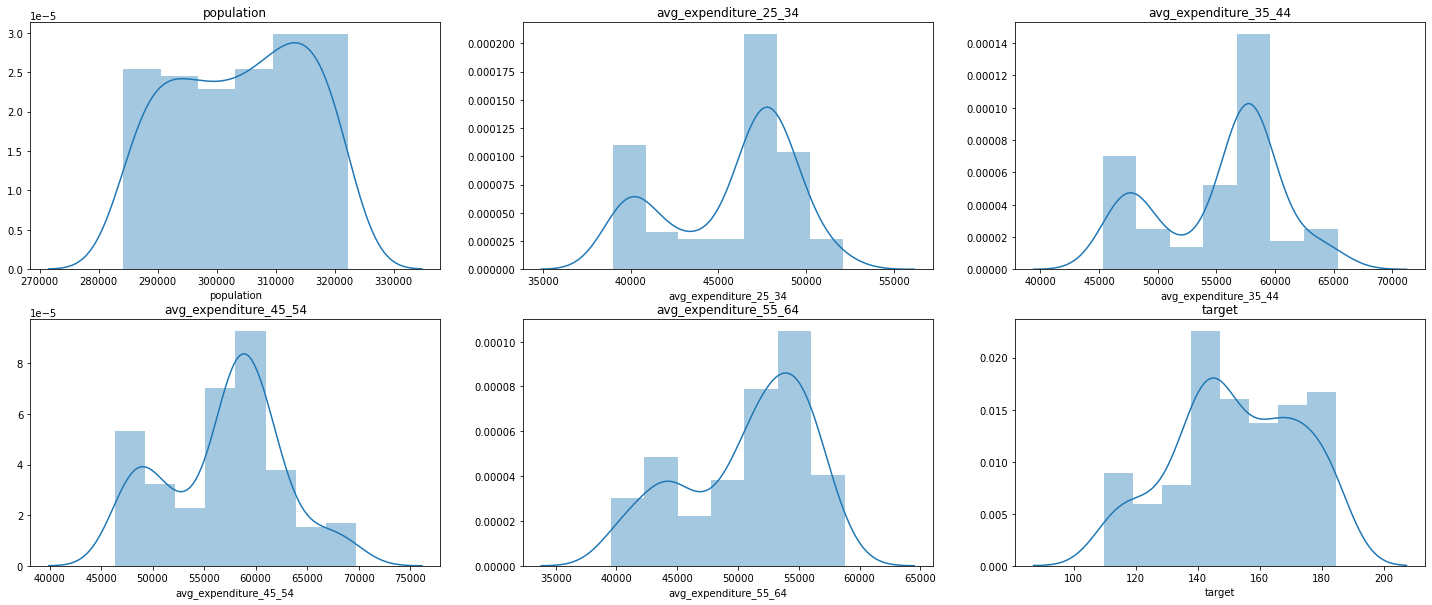

In [51]:
# Distribution plots 
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.distplot(demodf['population'], ax=axis[0, 0])
axis[0, 0].set_title("population")

sns.distplot(demodf['avg_expenditure_25_34'], ax=axis[0, 1])
axis[0, 1].set_title("avg_expenditure_25_34")

sns.distplot(demodf['avg_expenditure_35_44'], ax=axis[0, 2])
axis[0, 2].set_title("avg_expenditure_35_44")



sns.distplot(demodf['avg_expenditure_45_54'], ax=axis[1, 0])
axis[1, 0].set_title("avg_expenditure_45_54")

sns.distplot(demodf['avg_expenditure_55_64'], ax=axis[1, 1])
axis[1, 1].set_title("avg_expenditure_55_64")

sns.distplot(demodf['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")



Text(0.5, 1.0, 'target')

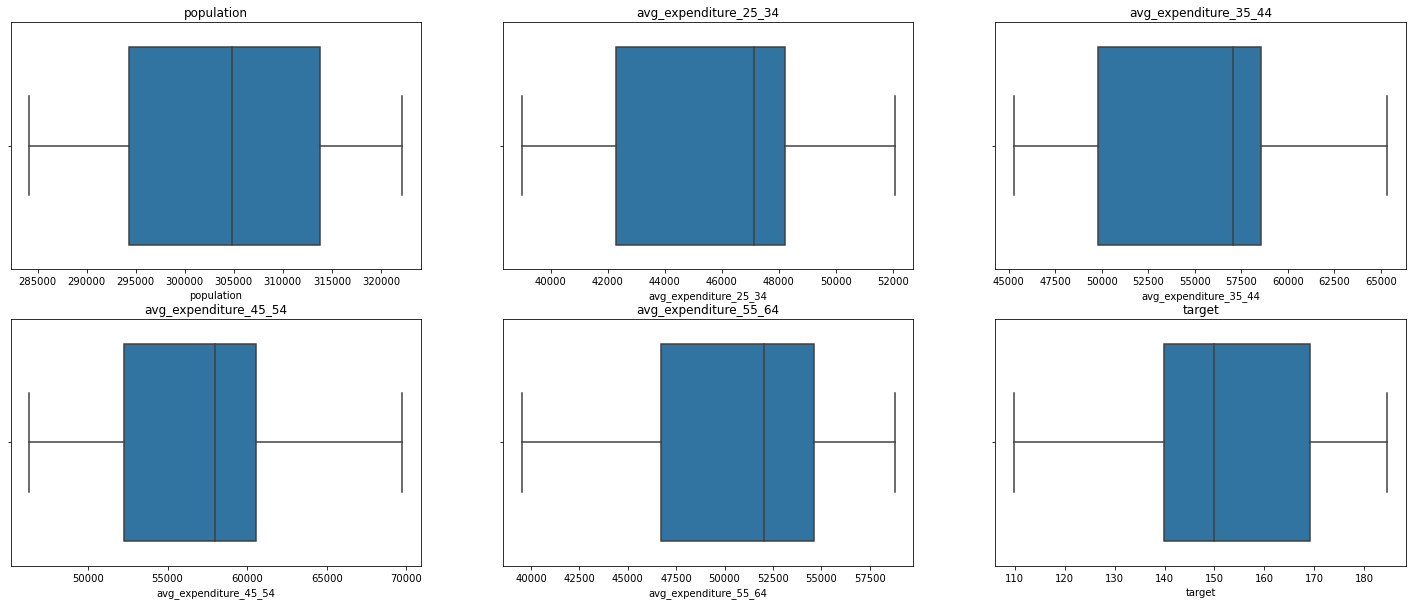

In [52]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.boxplot(demodf['population'], ax=axis[0, 0])
axis[0, 0].set_title("population")

sns.boxplot(demodf['avg_expenditure_25_34'], ax=axis[0, 1])
axis[0, 1].set_title("avg_expenditure_25_34")

sns.boxplot(demodf['avg_expenditure_35_44'], ax=axis[0, 2])
axis[0, 2].set_title("avg_expenditure_35_44")



sns.boxplot(demodf['avg_expenditure_45_54'], ax=axis[1, 0])
axis[1, 0].set_title("avg_expenditure_45_54")

sns.boxplot(demodf['avg_expenditure_55_64'], ax=axis[1, 1])
axis[1, 1].set_title("avg_expenditure_55_64")

sns.boxplot(demodf['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")



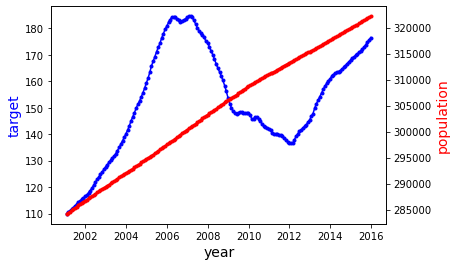

[[1.        0.4117042]
 [0.4117042 1.       ]]


In [53]:
plot_line(demodf,"target","population")

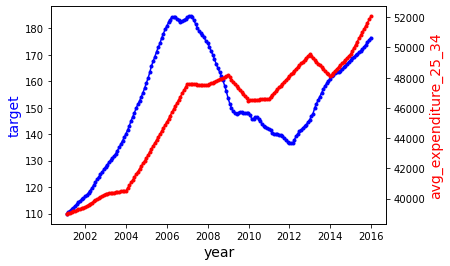

[[1.         0.62504918]
 [0.62504918 1.        ]]


In [54]:
plot_line(demodf,"target","avg_expenditure_25_34") 

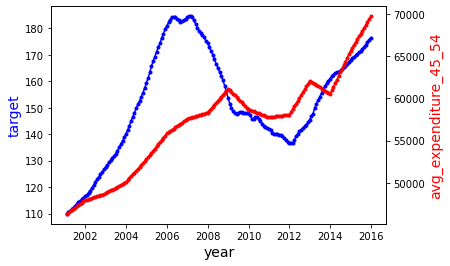

[[1.         0.61154038]
 [0.61154038 1.        ]]


In [55]:
plot_line(demodf,"target","avg_expenditure_45_54") 

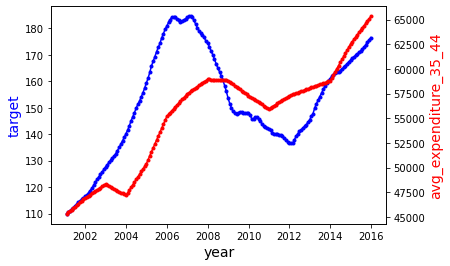

[[1.         0.66897841]
 [0.66897841 1.        ]]


In [56]:
plot_line(demodf,"target","avg_expenditure_35_44")

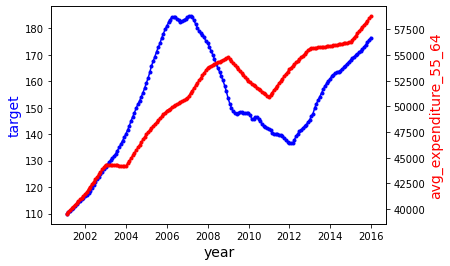

[[1.         0.60879469]
 [0.60879469 1.        ]]


In [57]:
plot_line(demodf,"target","avg_expenditure_55_64")

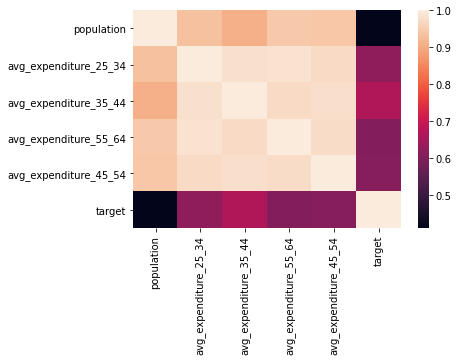

In [58]:
sns.heatmap(demodf.corr())

* There exists a very high collinearity between target and four independent variables, but the **four independent variables into consideration are also highly correlated**


### With lag of 12 months

In [59]:
demodf["avg_expenditure_55_64_lag12"] = demodf.avg_expenditure_55_64.shift(12).dropna()
demodf["avg_expenditure_35_44_lag12"] = demodf.avg_expenditure_35_44.shift(12).dropna()
demodf["avg_expenditure_25_34_lag12"] = demodf.avg_expenditure_25_34.shift(12).dropna()
demodf["population_lag"] = demodf.population.shift(12).dropna()

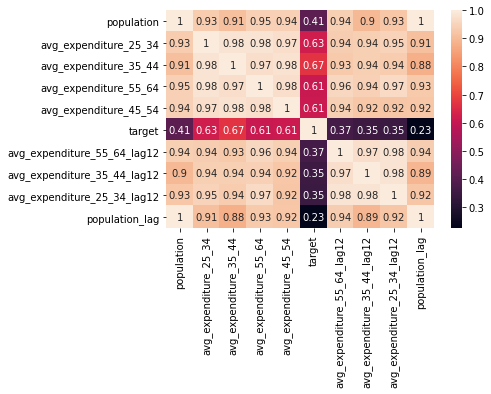

In [60]:
sns.heatmap(demodf.corr(),annot=True)


### Calculating rate of change of average expenditure accross age groups

In [61]:
demodf["avg_expenditure_55_64_rate"] = np.log(demodf.avg_expenditure_55_64/demodf.avg_expenditure_55_64.shift(12))
demodf["avg_expenditure_35_44_rate"] = np.log(demodf.avg_expenditure_35_44/demodf.avg_expenditure_35_44.shift(12))
demodf["avg_expenditure_25_34_rate"] = np.log(demodf.avg_expenditure_25_34/demodf.avg_expenditure_25_34.shift(12))
demodf["avg_expenditure_45_54_rate"] = np.log(demodf.avg_expenditure_45_54/demodf.avg_expenditure_45_54.shift(12))

In [62]:
(demodf.corr())

,population,avg_expenditure_25_34,avg_expenditure_35_44,avg_expenditure_55_64,avg_expenditure_45_54,target,avg_expenditure_55_64_lag12,avg_expenditure_35_44_lag12,avg_expenditure_25_34_lag12,population_lag,avg_expenditure_55_64_rate,avg_expenditure_35_44_rate,avg_expenditure_25_34_rate,avg_expenditure_45_54_rate
population,1.000000,0.933571,0.910183,0.945344,0.943799,0.411704,0.941846,0.897390,0.927154,0.999873,-0.428733,-0.137960,-0.238325,-0.048144
avg_expenditure_25_34,0.933571,1.000000,0.983354,0.984479,0.973711,0.625049,0.938263,0.940010,0.949772,0.911341,-0.283387,0.003142,-0.059832,0.068392
avg_expenditure_35_44,0.910183,0.983354,1.000000,0.973879,0.981350,0.668978,0.931590,0.940682,0.935488,0.879996,-0.294672,0.059522,-0.077720,0.086981
avg_expenditure_55_64,0.945344,0.984479,0.973879,1.000000,0.975075,0.608795,0.959612,0.943974,0.966569,0.930815,-0.300806,-0.035084,-0.162794,0.049074
avg_expenditure_45_54,0.943799,0.973711,0.981350,0.975075,1.000000,0.611540,0.941884,0.924538,0.922306,0.924631,-0.323823,0.034370,-0.074447,0.160660
target,0.411704,0.625049,0.668978,0.608795,0.611540,1.000000,0.366832,0.349961,0.346783,0.226360,0.095960,0.565489,0.402502,0.378036
avg_expenditure_55_64_lag12,0.941846,0.938263,0.931590,0.959612,0.941884,0.366832,1.000000,0.973694,0.982294,0.937254,-0.556325,-0.228478,-0.345392,-0.137818
avg_expenditure_35_44_lag12,0.897390,0.940010,0.940682,0.943974,0.924538,0.349961,0.973694,1.000000,0.982953,0.891305,-0.515692,-0.281766,-0.348532,-0.173858
avg_expenditure_25_34_lag12,0.927154,0.949772,0.935488,0.966569,0.922306,0.346783,0.982294,0.982953,1.000000,0.922247,-0.475575,-0.242596,-0.368826,-0.178342
population_lag,0.999873,0.911341,0.879996,0.930815,0.924631,0.226360,0.937254,0.891305,0.922247,1.000000,-0.427000,-0.139699,-0.238055,-0.048488



### Since median age of homebuyers(all) is 47 years in USA, we'll combine average expenditure 35-44 age group with average expenditure 45-54 age group

Source [https://www.financialsamurai.com/the-median-homebuyer-age-is-now-so-old/]

In [63]:
df["avg_expenditure_35_54"] = df["avg_expenditure_35_44"] +df["avg_expenditure_45_54"]

# Mortgages
* HCAI_GOVT
* HCAI_GSE
* HCAI_PP
* MORTGAGE30US


In [64]:
mordf = df.copy()
mordf = mordf[["target","HCAI_GOVT","HCAI_GSE","HCAI_PP","MORTGAGE30US"]]
mordf

,target,HCAI_GOVT,HCAI_GSE,HCAI_PP,MORTGAGE30US
2001-01-31,109.845,22.218,5.836,16.253,7.0325
2001-02-28,110.499,22.108,5.776,16.053,7.0500
2001-03-31,111.107,21.998,5.716,15.853,6.9520
2001-04-30,111.650,21.887,5.647,15.664,7.0775
2001-05-31,112.162,22.037,5.617,15.514,7.1450
...,...,...,...,...,...
2015-08-31,172.954,9.735,2.221,2.358,3.9050
2015-09-30,173.848,9.775,2.231,2.388,3.8900
2015-10-31,174.811,9.805,2.230,2.432,3.7960
2015-11-30,175.755,9.945,2.260,2.492,3.9425


Text(0.5, 1.0, 'MORTGAGE30US')

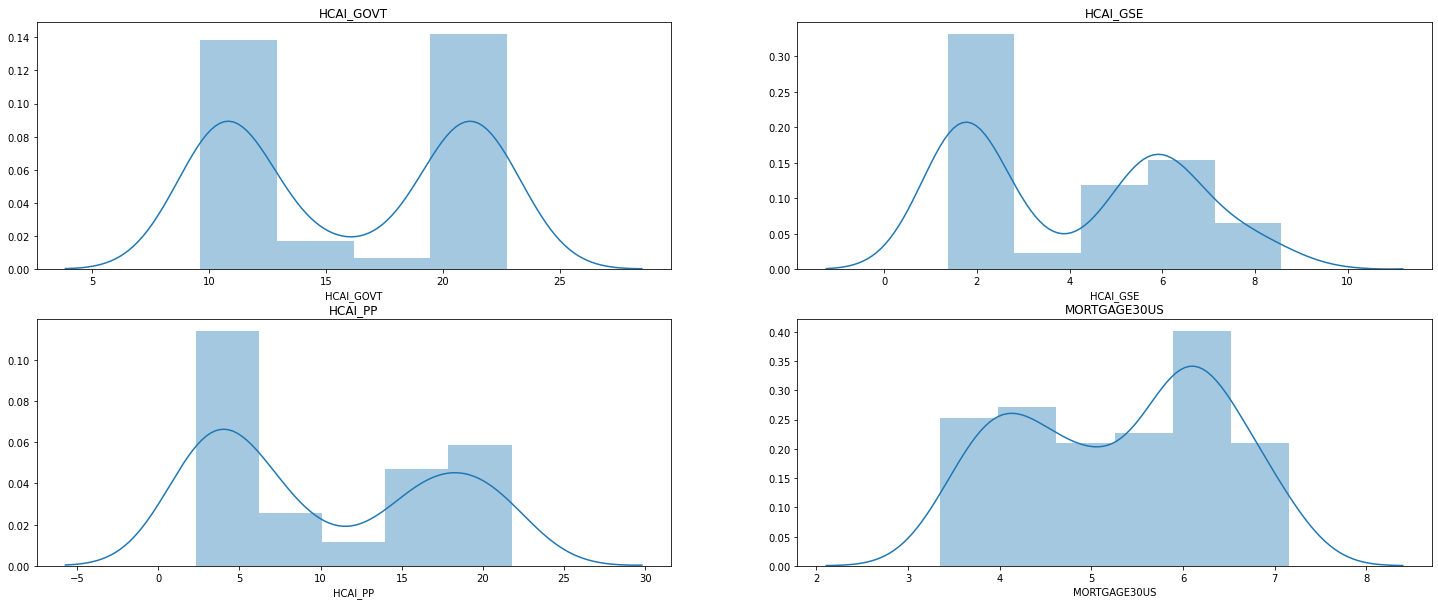

In [65]:
# Distribution plots 
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.distplot(mordf['HCAI_GOVT'], ax=axis[0, 0])
axis[0, 0].set_title("HCAI_GOVT")

sns.distplot(mordf['HCAI_GSE'], ax=axis[0, 1])
axis[0, 1].set_title("HCAI_GSE")




sns.distplot(mordf['HCAI_PP'], ax=axis[1, 0])
axis[1, 0].set_title("HCAI_PP")

sns.distplot(mordf['MORTGAGE30US'], ax=axis[1, 1])
axis[1, 1].set_title("MORTGAGE30US")


Text(0.5, 1.0, 'MORTGAGE30US')

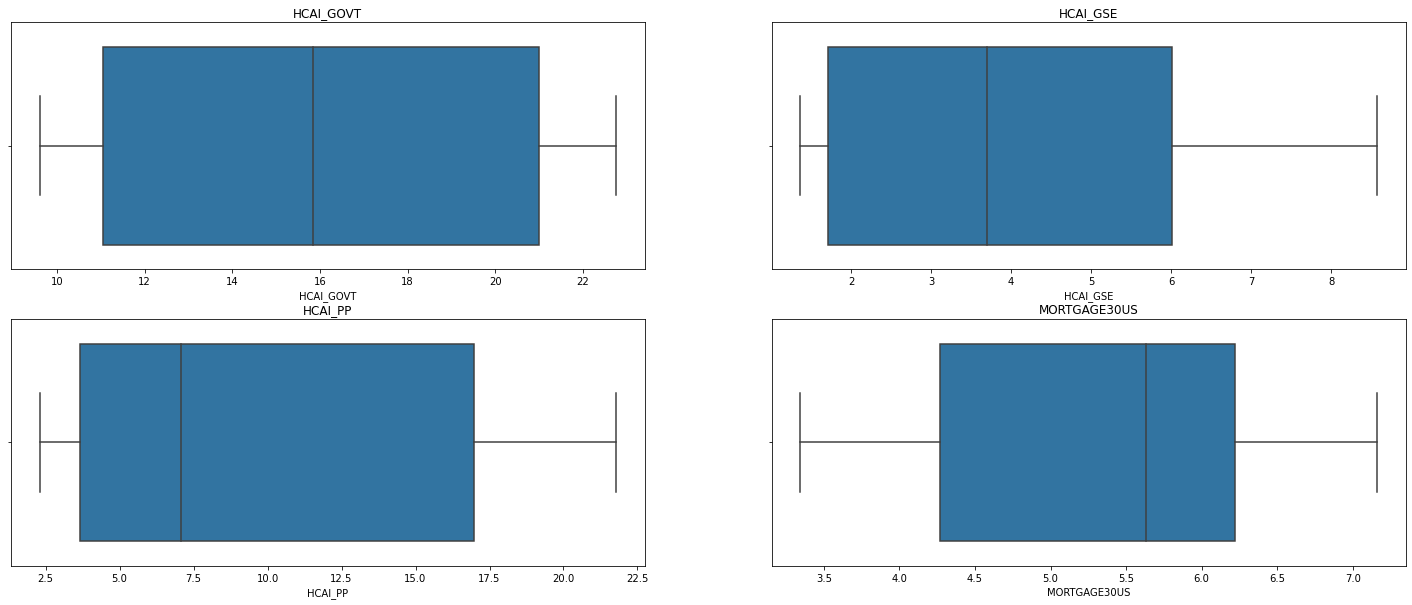

In [66]:
#Box plots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.boxplot(mordf['HCAI_GOVT'], ax=axis[0, 0])
axis[0, 0].set_title("HCAI_GOVT")

sns.boxplot(mordf['HCAI_GSE'], ax=axis[0, 1])
axis[0, 1].set_title("HCAI_GSE")




sns.boxplot(mordf['HCAI_PP'], ax=axis[1, 0])
axis[1, 0].set_title("HCAI_PP")

sns.boxplot(mordf['MORTGAGE30US'], ax=axis[1, 1])
axis[1, 1].set_title("MORTGAGE30US")


In [67]:
# lag = 96
# mordf["HCAI_GSE_lag"] = mordf.HCAI_GSE.shift(lag).dropna()
# mordf["HCAI_GOVT_lag"] = mordf.HCAI_GOVT.shift(lag).dropna()
# mordf["HCAI_PP_lag"] = mordf.HCAI_PP.shift(lag).dropna()
# mordf["MORTGAGE30US_lag"] = mordf.MORTGAGE30US.shift(lag).dropna()
# mordf.corr()

### There exists a high correlation between target and HCAI index with lag of 96( 8 years), but since we have limited data, we cannot use lag of 96

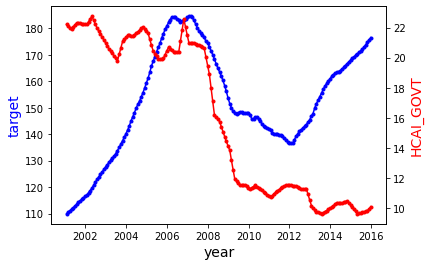

[[ 1.         -0.11447179]
 [-0.11447179  1.        ]]


In [68]:
plot_line(mordf,"target","HCAI_GOVT")

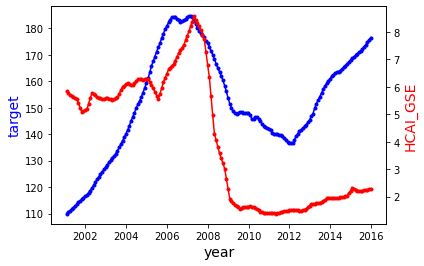

[[1.         0.20015417]
 [0.20015417 1.        ]]


In [69]:
plot_line(mordf,"target","HCAI_GSE")

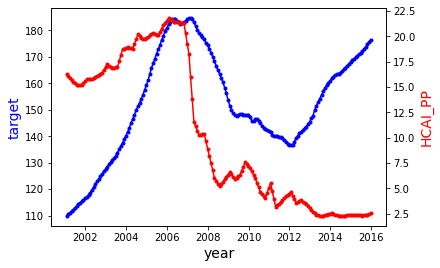

[[ 1.         -0.02275183]
 [-0.02275183  1.        ]]


In [70]:
plot_line(mordf,"target","HCAI_PP")

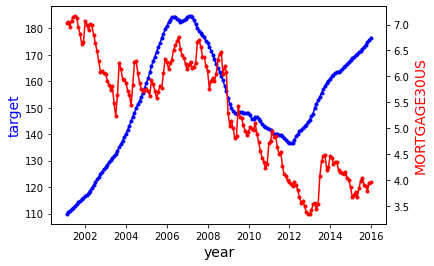

[[ 1.         -0.11660445]
 [-0.11660445  1.        ]]


In [71]:
plot_line(mordf,"target","MORTGAGE30US")

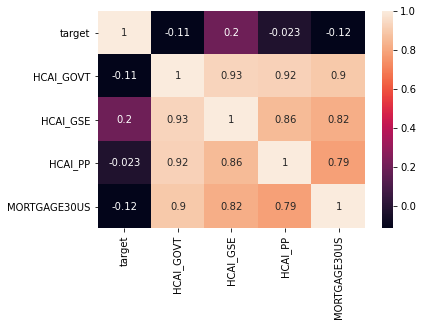

In [72]:
sns.heatmap(mordf.corr(),annot = True)

# Health of the economy
* GDP                                  
* CPI         
* private_job_gains                    
* personal_saving_rate
* UNRATE - Unemployment rate
* unrate_construction -  Unemployment rate in construction industry

In [73]:
ecodf = df.copy()
ecodf = ecodf[["target","GDP","CPI","private_job_gains","UNRATE","unrate_construction"]]
ecodf

,target,GDP,CPI,private_job_gains,UNRATE,unrate_construction
2001-01-31,109.845,10470.231,0.632184,3001.33,4.2,9.8
2001-02-28,110.499,10513.151,0.399772,3001.33,4.2,9.9
2001-03-31,111.107,10556.071,0.227531,3001.33,4.3,8.4
2001-04-30,111.650,10599.000,0.397276,2813.00,4.4,7.1
2001-05-31,112.162,10598.670,0.452233,2813.00,4.3,5.6
...,...,...,...,...,...,...
2015-08-31,172.954,18315.330,-0.141628,2415.67,5.1,6.1
2015-09-30,173.848,18323.700,-0.155676,2415.67,5.0,5.5
2015-10-31,174.811,18332.079,-0.044968,2539.00,5.0,6.2
2015-11-30,175.755,18363.159,-0.211068,2539.00,5.1,6.2


Text(0.5, 1.0, 'unrate_construction')

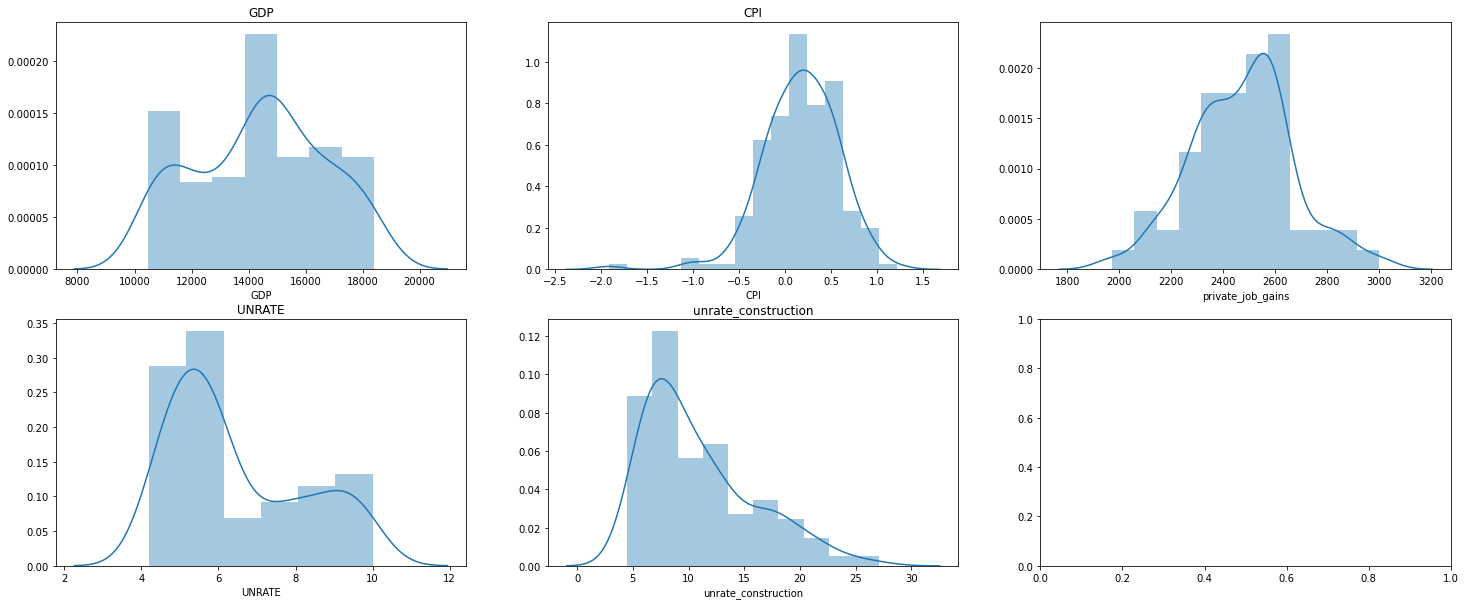

In [74]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.distplot(ecodf['GDP'], ax=axis[0, 0])
axis[0, 0].set_title("GDP")

sns.distplot(ecodf['CPI'], ax=axis[0, 1])
axis[0, 1].set_title("CPI")


sns.distplot(ecodf['private_job_gains'], ax=axis[0, 2])
axis[1, 0].set_title("private_job_gains")


sns.distplot(ecodf['UNRATE'], ax=axis[1, 0])
axis[1, 0].set_title("UNRATE")

sns.distplot(ecodf['unrate_construction'], ax=axis[1, 1])
axis[1, 1].set_title("unrate_construction")


Text(0.5, 1.0, 'unrate_construction')

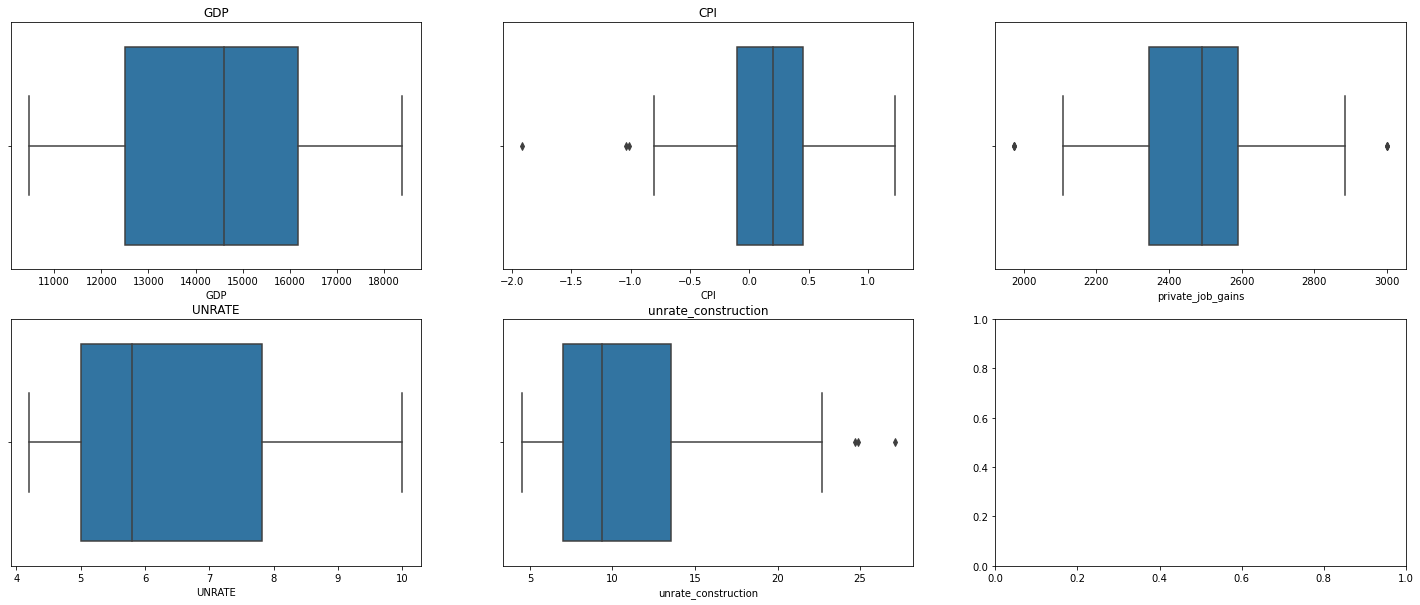

In [75]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.boxplot(ecodf['GDP'], ax=axis[0, 0])
axis[0, 0].set_title("GDP")

sns.boxplot(ecodf['CPI'], ax=axis[0, 1])
axis[0, 1].set_title("CPI")


sns.boxplot(ecodf['private_job_gains'], ax=axis[0, 2])
axis[1, 0].set_title("private_job_gains")


sns.boxplot(ecodf['UNRATE'], ax=axis[1, 0])
axis[1, 0].set_title("UNRATE")

sns.boxplot(ecodf['unrate_construction'], ax=axis[1, 1])
axis[1, 1].set_title("unrate_construction")


## Using log tranformation to handle outliers

In [76]:

ecodf['unrate_construction'] = np.log(ecodf['unrate_construction'])


#### Private job gains is number of job gains in the given month, hence we can add a cum sum of the series as a feature

In [77]:
ecodf["private_job_gains_cum"] = ecodf["private_job_gains"].cumsum()

In [78]:
np.corrcoef(ecodf["target"],ecodf["private_job_gains_cum"]/ecodf["UNRATE"])

array([[1.        , 0.67467396],
       [0.67467396, 1.        ]])

In [79]:
ecodf["private_job_gains_cum_per_unrate"] = ecodf["private_job_gains_cum"]/ecodf["UNRATE"]


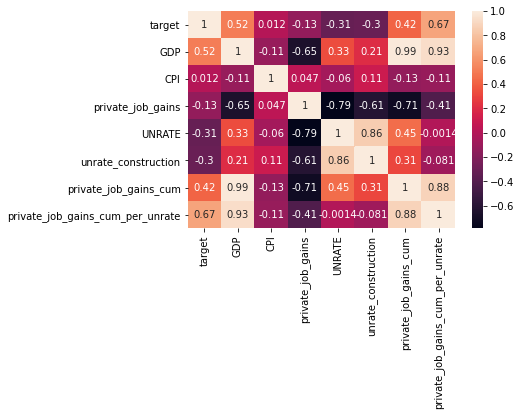

In [80]:
sns.heatmap(ecodf.corr(),annot=True)

* We have calculate GDP per capita, hence we can drop GDP
* We have also calculated cumulative private job gains per unit unemployment rate
* Neither CPI, nor CPI rate is linearly correlated with data
* Unemployment rate, private job gains, unemployment rate construction are also highly correlated with each other

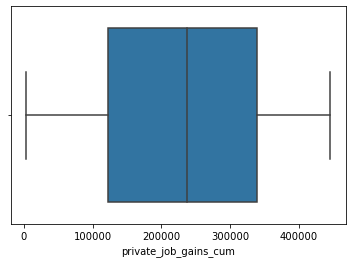

In [81]:
sns.boxplot(ecodf['private_job_gains_cum'])


# Construction Industry
* employees_construction
* industrial_production_cement
* pvt_owned_house_under_const
* residential_const_val
* producer_price_index_concrete_brick

In [82]:
condf = df.copy()
condf = condf[["target","employees_construction","industrial_production_cement","pvt_owned_house_under_const","residential_const_val","producer_price_index_concrete_brick"]]

In [83]:
condf

,target,employees_construction,industrial_production_cement,pvt_owned_house_under_const,residential_const_val,producer_price_index_concrete_brick
2001-01-31,109.845,6824,139.6212,986.0,348279,144.2
2001-02-28,110.499,6841,144.0119,987.0,353629,144.2
2001-03-31,111.107,6862,147.6176,1001.0,350029,144.2
2001-04-30,111.650,6844,152.7136,1007.0,361991,148.0
2001-05-31,112.162,6849,149.7220,1015.0,360534,149.3
...,...,...,...,...,...,...
2015-08-31,172.954,6490,114.2742,921.0,438567,208.4
2015-09-30,173.848,6508,114.3883,939.0,447202,208.4
2015-10-31,174.811,6547,113.1105,943.0,448312,208.4
2015-11-30,175.755,6598,112.9790,962.0,447200,208.4


In [84]:
condf["construction_cost"] = condf["residential_const_val"] / condf["pvt_owned_house_under_const"]

In [85]:
condf["employees_construction_cum"] = condf["employees_construction"].cumsum()

condf["residential_const_val_cum"] = condf["residential_const_val"].cumsum()

condf["pvt_owned_house_under_const_cum"] = condf["pvt_owned_house_under_const"].cumsum()

condf["industrial_production_cement_cum"] = condf["industrial_production_cement"].cumsum()


condf["construction_cost_cum"] = condf["construction_cost"].cumsum()


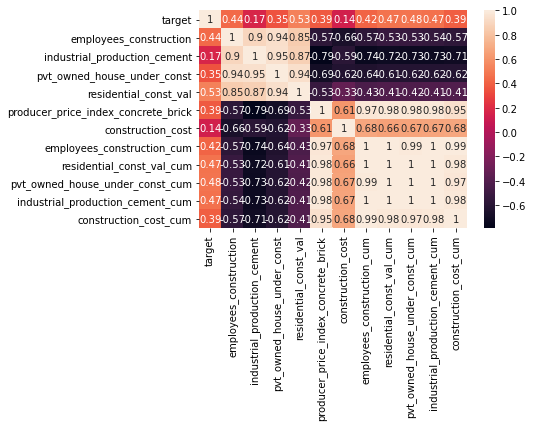

In [86]:
sns.heatmap(condf.corr(),annot=True)

In [87]:
x = 12
condf["employees_construction_cum"] = condf["employees_construction"].rolling(window=x).sum()

condf["residential_const_val_cum"] = condf["residential_const_val"].rolling(window=x).sum()

condf["pvt_owned_house_under_const_cum"] = condf["pvt_owned_house_under_const"].rolling(window=x).sum()

condf["industrial_production_cement_cum"] = condf["industrial_production_cement"].rolling(window=x).sum()

condf["construction_cost_cum"] = condf["construction_cost"].rolling(window=x).sum()


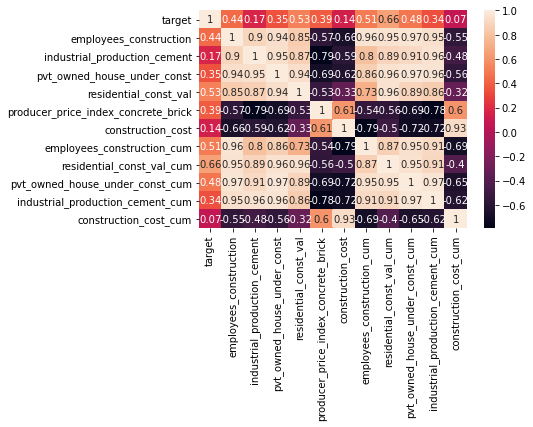

In [88]:
sns.heatmap(condf.corr(),annot=True)

* Construction variables are highly correlated with each other
* The rolling sum of 12 months of residial construction value is the most correlated with the target

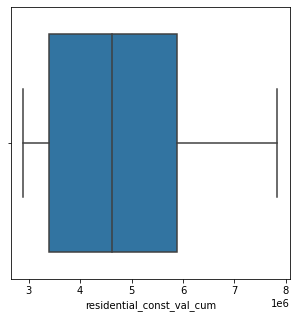

In [89]:
figure, axis = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(condf['residential_const_val_cum'],)




# Housing industry
* houses-for-sale-to-sold - Number of houses for sale vs number of houses got sold
* home-ownership-rate
* house_units_completed - Number of new house units completed in a given month   
* retail_sales_home_furnishing_stores  - Sales of home furnishing stores


In [91]:
houdf = df.copy()

houdf = houdf[["target","houses-for-sale-to-sold","home-ownership-rate","house_units_completed","retail_sales_home_furnishing_stores"]]

In [92]:
houdf

,target,houses-for-sale-to-sold,home-ownership-rate,house_units_completed,retail_sales_home_furnishing_stores
2001-01-31,109.845,3.8,67.10,1456.0,7764
2001-02-28,110.499,3.7,67.17,1536.0,7611
2001-03-31,111.107,3.8,67.24,1470.0,7549
2001-04-30,111.650,3.9,67.31,1574.0,7560
2001-05-31,112.162,4.0,67.30,1497.0,7559
...,...,...,...,...,...
2015-08-31,172.954,5.0,64.29,974.0,9086
2015-09-30,173.848,5.9,64.30,1040.0,9045
2015-10-31,174.811,5.6,64.17,985.0,9162
2015-11-30,175.755,5.5,64.04,1000.0,9152


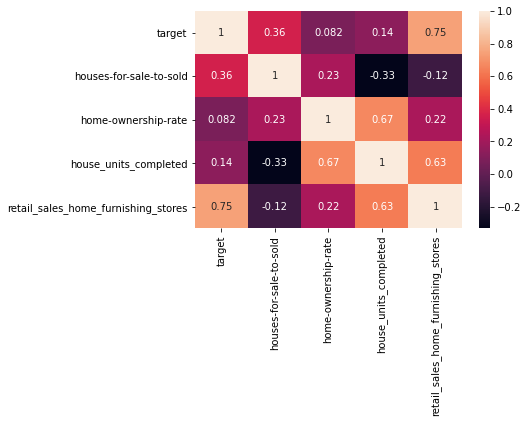

In [93]:
sns.heatmap(houdf.corr(),annot=True)

Text(0.5, 1.0, 'retail_sales_home_furnishing_stores')

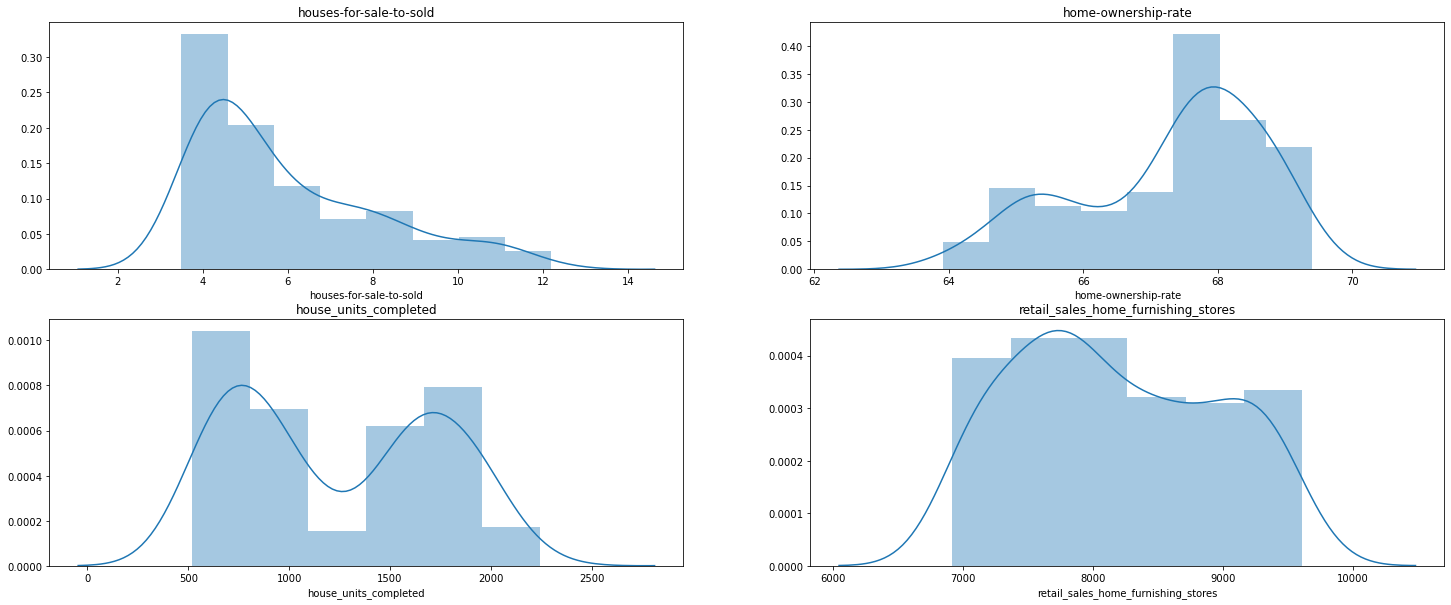

In [94]:
# Distribution plots 
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.distplot(houdf['houses-for-sale-to-sold'], ax=axis[0, 0])
axis[0, 0].set_title("houses-for-sale-to-sold")

sns.distplot(houdf['home-ownership-rate'], ax=axis[0, 1])
axis[0, 1].set_title("home-ownership-rate")



sns.distplot(houdf['house_units_completed'], ax=axis[1, 0])
axis[1, 0].set_title("house_units_completed")

sns.distplot(houdf['retail_sales_home_furnishing_stores'], ax=axis[1, 1])
axis[1, 1].set_title("retail_sales_home_furnishing_stores")


Text(0.5, 1.0, 'retail_sales_home_furnishing_stores')

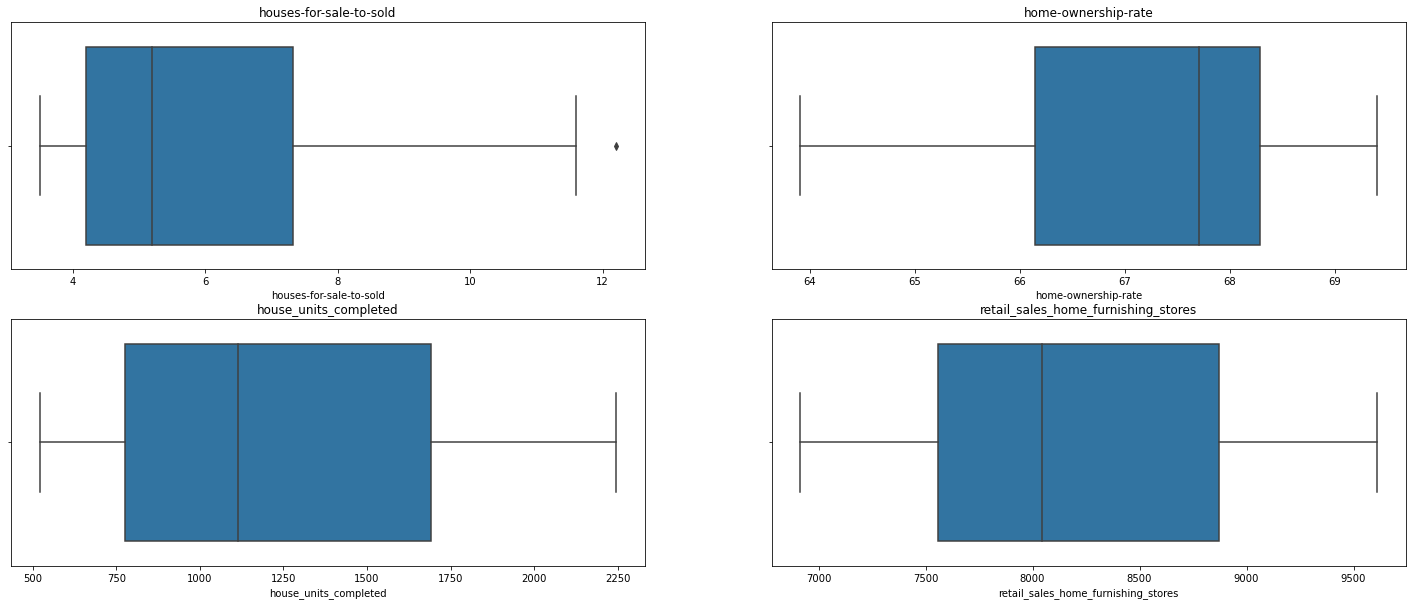

In [95]:
# Box plots 
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.boxplot(houdf['houses-for-sale-to-sold'], ax=axis[0, 0])
axis[0, 0].set_title("houses-for-sale-to-sold")

sns.boxplot(houdf['home-ownership-rate'], ax=axis[0, 1])
axis[0, 1].set_title("home-ownership-rate")



sns.boxplot(houdf['house_units_completed'], ax=axis[1, 0])
axis[1, 0].set_title("house_units_completed")

sns.boxplot(houdf['retail_sales_home_furnishing_stores'], ax=axis[1, 1])
axis[1, 1].set_title("retail_sales_home_furnishing_stores")


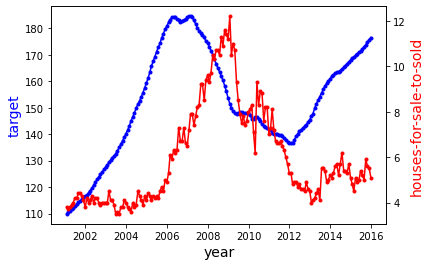

[[1.        0.3594703]
 [0.3594703 1.       ]]


In [96]:
plot_line(houdf,"target","houses-for-sale-to-sold")

In [97]:
x = 12
houdf["houses-for-sale-to-sold_cum"] = houdf["houses-for-sale-to-sold"].rolling(window=x).sum()

houdf["house_units_completed_cum"] = houdf["house_units_completed"].rolling(window=x).sum()

houdf["retail_sales_home_furnishing_stores_cum"] = houdf["retail_sales_home_furnishing_stores"].rolling(window=x).sum()

houdf["home-ownership-rate-cum"] = houdf["home-ownership-rate"].rolling(window=x).sum()




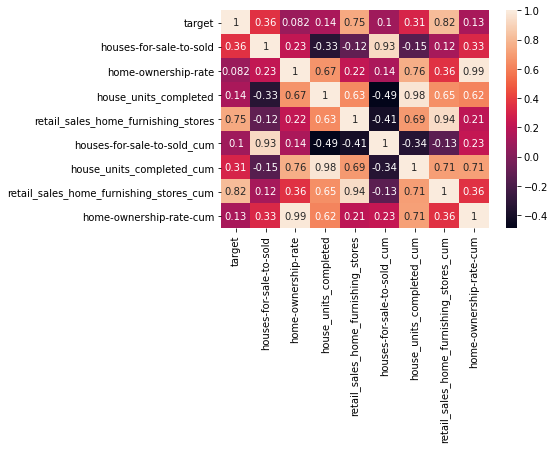

In [98]:
sns.heatmap(houdf.corr(),annot=True)

# Infrastructure and permits
* nonresidential_const_val
* permits   

In [99]:
infdf = df.copy()
infdf = infdf[['target','permits','nonresidential_const_val']]

infdf

,target,permits,nonresidential_const_val
2001-01-31,109.845,1699,278005
2001-02-28,110.499,1656,270735
2001-03-31,111.107,1659,280450
2001-04-30,111.650,1666,278653
2001-05-31,112.162,1665,281069
...,...,...,...
2015-08-31,172.954,1165,425883
2015-09-30,173.848,1144,425801
2015-10-31,174.811,1160,419386
2015-11-30,175.755,1244,420334


In [100]:
infdf["permits_cum"] = np.log((infdf["permits"].cumsum()))
infdf["nonresidential_const_val"] = np.log(infdf["nonresidential_const_val"].cumsum())

infdf["permits_cum"] = infdf["permits"].rolling(window=12).sum()
infdf["nonresidential_const_val"] = infdf["nonresidential_const_val"].rolling(window=12).sum()

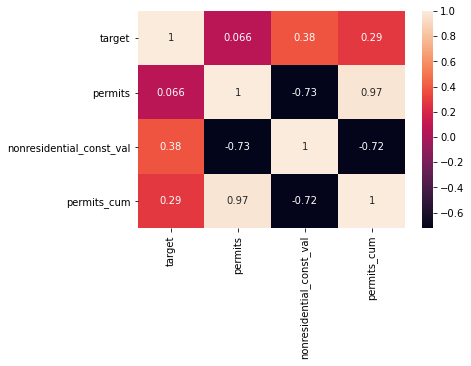

In [101]:
sns.heatmap(infdf.corr(),annot=True)

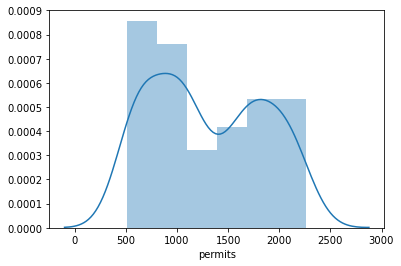

In [102]:
sns.distplot(infdf['permits'],)

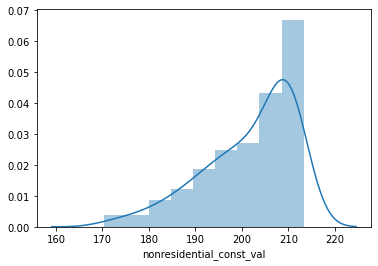

In [103]:
sns.distplot(infdf['nonresidential_const_val'],)